# Neural Networks

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **forward** and **backward** operations for different layers in neural networks, the layers including:
  - fully-connected layer
  - pooling layer
  - relu layer
  - convolution layer
- implement stochastic gradient descent with momentum for optimization
- implement neural networks for classification on the mnist digit classification dataset

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

This homework is modified from the assignment2 of [cs231n](http://cs231n.stanford.edu/) in stanford.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from fc_net import *
from data_utils import get_MNIST_data
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# Load the (preprocessed) mnist data.

data = get_MNIST_data()
print(data)
for k, v in data.items():
    print('%s: ' % k, v.shape)

{'X_train': array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ...,

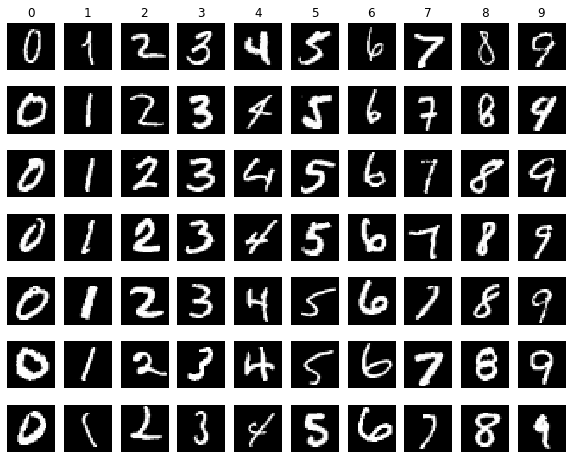

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(data['y_train'] == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(data['X_train'][idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Affine layer: foward
Open the file `layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [5]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
print(out)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.514132,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

[[1.49834967 1.70660132 1.91485297]
 [3.25553199 3.5141327  3.77273342]]
Testing affine_forward function:
difference: 9.994160505322024e-08


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [6]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing affine_backward function:
dx error: 5.401792972362587e-10
dw error: 2.0031425457109156e-10
db error: 1.16695396725691e-11


# ReLU layer: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [7]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

Testing relu_forward function:
difference: 4.999999798022158e-08


# ReLU layer: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [8]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing relu_backward function:
dx error: 3.2756100563356417e-12


## Inline Question 1: 

We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. [Leaky ReLU](https://cs231n.github.io/neural-networks-1/)

# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [9]:
from layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing affine_relu_forward and affine_relu_backward:
dx error: 3.9764277570932176e-11
dw error: 8.887967898599127e-11
db error: 7.826709281477714e-12


# Loss layers: Softmax and SVM
We give some loss functions here. You should still make sure you understand how they work by looking at the implementations in `layers.py`.

You can make sure that the implementations are correct by running the following:

In [10]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9
print('Testing svm_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print('\nTesting softmax_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing svm_loss:
loss: 8.999520569346735
dx error: 1.4021566006651672e-09

Testing softmax_loss:
loss: 2.302537579952644
dx error: 8.515815459590712e-09


# Two-layer network

Now you will reimplement the two layer network using these modular implementations.

Open the file `fc_net.py` and complete the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks you will implement in this assignment, so read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [11]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-2
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = {}'.format(reg))
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg = 0.0
W1 relative error: 1.8336562786695002e-08
W2 relative error: 3.201560569143183e-10
b1 relative error: 9.828315204644842e-09
b2 relative error: 4.329134954569865e-10
Running numeric gradient check with reg = 0.7
W1 relative error: 2.5279152310200606e-07
W2 relative error: 2.8508510893102143e-08
b1 relative error: 1.564679947504764e-08
b2 relative error: 9.089617896905665e-10


# Solver

Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `95%` accuracy on the validation set.

In [11]:
model = TwoLayerNet()
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 95% accuracy on the validation set.                                        #
##############################################################################
# begin answer
data = {
    'X_train': data['X_train'],  # training data
    'y_train': data['y_train'],  # training labels
    'X_val':  data['X_val'],  # validation data
    'y_val': data['y_val']  # validation labels
}

solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                    'learning_rate': 1e-1,
                },
                lr_decay=0.95,
                num_epochs=10, batch_size=100,
                print_every=100)
solver.train()
# end answer

(Iteration 1 / 5000) loss: 2.302574
(Epoch 0 / 10) train acc: 0.105000; val_acc: 0.105300
(Iteration 101 / 5000) loss: 2.017638
(Iteration 201 / 5000) loss: 0.908373
(Iteration 301 / 5000) loss: 0.518151
(Iteration 401 / 5000) loss: 0.471421
(Epoch 1 / 10) train acc: 0.885000; val_acc: 0.891100
(Iteration 501 / 5000) loss: 0.487247
(Iteration 601 / 5000) loss: 0.427256
(Iteration 701 / 5000) loss: 0.289280
(Iteration 801 / 5000) loss: 0.478641
(Iteration 901 / 5000) loss: 0.258877
(Epoch 2 / 10) train acc: 0.913000; val_acc: 0.914500
(Iteration 1001 / 5000) loss: 0.314963
(Iteration 1101 / 5000) loss: 0.268060
(Iteration 1201 / 5000) loss: 0.397907
(Iteration 1301 / 5000) loss: 0.343449
(Iteration 1401 / 5000) loss: 0.398806
(Epoch 3 / 10) train acc: 0.928000; val_acc: 0.927100
(Iteration 1501 / 5000) loss: 0.259214
(Iteration 1601 / 5000) loss: 0.307517
(Iteration 1701 / 5000) loss: 0.198880
(Iteration 1801 / 5000) loss: 0.382409
(Iteration 1901 / 5000) loss: 0.313426
(Epoch 4 / 10) t

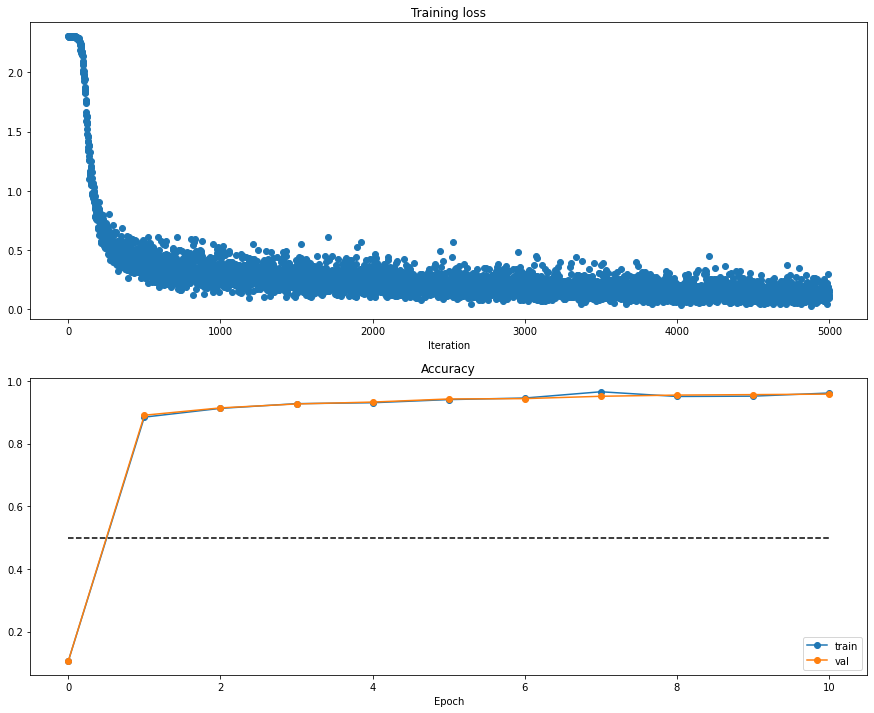

In [12]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `fc_net.py`.

Implement the initialization, the forward pass, and the backward pass.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-6 or less.

In [28]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print('Running check with reg = {}'.format(reg))
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

    loss, grads = model.loss(X, y)
    print('Initial loss: {}'.format(loss))

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Running check with reg = 0
Initial loss: 2.302102534953593
W1 relative error: 4.269688052877426e-07
W2 relative error: 3.1991149655413863e-07
W3 relative error: 3.421263628690277e-07
b1 relative error: 3.290275283423148e-08
b2 relative error: 1.9458418322648948e-07
b3 relative error: 1.6498767354417735e-10
Running check with reg = 3.14
Initial loss: 7.234928396733905
W1 relative error: 1.0937969831556883e-08
W2 relative error: 3.3499393881697106e-08
W3 relative error: 2.3333346600730817e-08
b1 relative error: 3.1123965486515615e-08
b2 relative error: 1.1987944920542973e-08
b3 relative error: 1.5752908903750665e-10


As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. You will need to tweak the learning rate and initialization scale, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.337468
(Epoch 0 / 20) train acc: 0.260000; val_acc: 0.139400
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.152300
(Epoch 2 / 20) train acc: 0.560000; val_acc: 0.211300
(Epoch 3 / 20) train acc: 0.620000; val_acc: 0.298100
(Epoch 4 / 20) train acc: 0.680000; val_acc: 0.370400
(Epoch 5 / 20) train acc: 0.820000; val_acc: 0.466600
(Iteration 11 / 40) loss: 0.895707
(Epoch 6 / 20) train acc: 0.580000; val_acc: 0.259300
(Epoch 7 / 20) train acc: 0.880000; val_acc: 0.508900
(Epoch 8 / 20) train acc: 0.900000; val_acc: 0.447600
(Epoch 9 / 20) train acc: 0.940000; val_acc: 0.518800
(Epoch 10 / 20) train acc: 0.980000; val_acc: 0.540800
(Iteration 21 / 40) loss: 0.238208
(Epoch 11 / 20) train acc: 0.980000; val_acc: 0.600200
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.602000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.541000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.608400
(Epoch 15 / 20) train acc: 0.980000; val_acc: 0.566500
(Iteration 31 / 40) loss: 

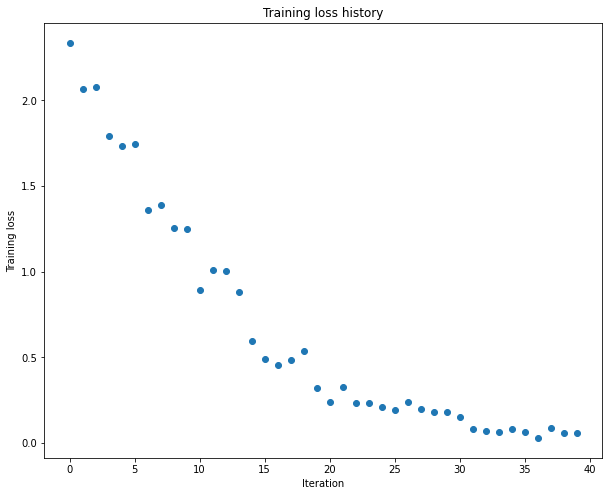

In [29]:
# TODO: Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-1
learning_rate = 0.2
# tweak these two parameters
# begin answer
# end answer
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.315283
(Epoch 0 / 20) train acc: 0.120000; val_acc: 0.105600
(Epoch 1 / 20) train acc: 0.260000; val_acc: 0.124300
(Epoch 2 / 20) train acc: 0.300000; val_acc: 0.164300
(Epoch 3 / 20) train acc: 0.320000; val_acc: 0.154300
(Epoch 4 / 20) train acc: 0.620000; val_acc: 0.250000
(Epoch 5 / 20) train acc: 0.380000; val_acc: 0.182900
(Iteration 11 / 40) loss: 1.655850
(Epoch 6 / 20) train acc: 0.580000; val_acc: 0.341600
(Epoch 7 / 20) train acc: 0.440000; val_acc: 0.228200
(Epoch 8 / 20) train acc: 0.520000; val_acc: 0.284100
(Epoch 9 / 20) train acc: 0.620000; val_acc: 0.404200
(Epoch 10 / 20) train acc: 0.340000; val_acc: 0.192800
(Iteration 21 / 40) loss: 2.550775
(Epoch 11 / 20) train acc: 0.620000; val_acc: 0.372500
(Epoch 12 / 20) train acc: 0.740000; val_acc: 0.447300
(Epoch 13 / 20) train acc: 0.900000; val_acc: 0.511500
(Epoch 14 / 20) train acc: 0.740000; val_acc: 0.390600
(Epoch 15 / 20) train acc: 0.920000; val_acc: 0.539600
(Iteration 31 / 40) loss: 

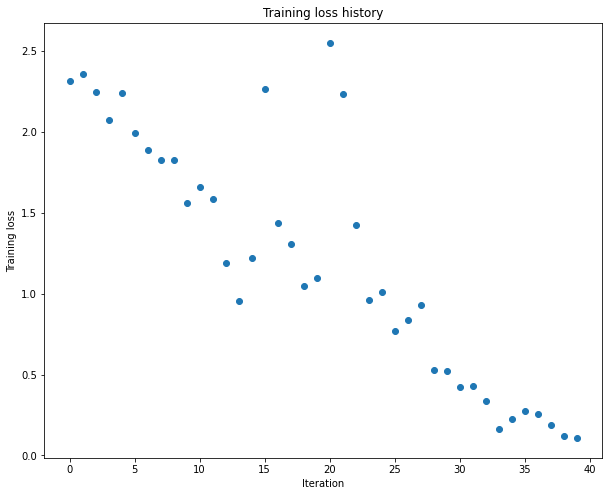

In [31]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-1
learning_rate = 0.2
# begin answer
# end answer
model = FullyConnectedNet([100, 100, 100, 100],
            weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
               )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

## Inline question 2: 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five layer net?


# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule in assignment2.
```
# Vanilla update
x += - learning_rate * dx
```

More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

```python
# Momentum update
v = mu * v - learning_rate * dx # integrate velocity
x += v # integrate position
```

Now open the file `optim.py` and read the documentation at the top of the file to make sure you understand the API. The implementation of vanilla SGD is provided. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than 1e-8.

In [32]:
from optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))

next_w error: 8.882347033505819e-09
velocity error: 4.269287743278663e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with sgd
(Iteration 1 / 800) loss: 2.302628
(Epoch 0 / 20) train acc: 0.134000; val_acc: 0.105400
(Iteration 11 / 800) loss: 2.303357
(Iteration 21 / 800) loss: 2.305150
(Iteration 31 / 800) loss: 2.300541
(Epoch 1 / 20) train acc: 0.100000; val_acc: 0.113500
(Iteration 41 / 800) loss: 2.305599
(Iteration 51 / 800) loss: 2.298893
(Iteration 61 / 800) loss: 2.297473
(Iteration 71 / 800) loss: 2.298628
(Epoch 2 / 20) train acc: 0.140000; val_acc: 0.153900
(Iteration 81 / 800) loss: 2.294819
(Iteration 91 / 800) loss: 2.296549
(Iteration 101 / 800) loss: 2.294836
(Iteration 111 / 800) loss: 2.295224
(Epoch 3 / 20) train acc: 0.195000; val_acc: 0.177800
(Iteration 121 / 800) loss: 2.289419
(Iteration 131 / 800) loss: 2.280477
(Iteration 141 / 800) loss: 2.283771
(Iteration 151 / 800) loss: 2.286332
(Epoch 4 / 20) train acc: 0.191000; val_acc: 0.200300
(Iteration 161 / 800) loss: 2.285118
(Iteration 171 / 800) loss: 2.276006
(Iteration 181 / 800) loss: 2.275234
(Iteration 191 / 800)

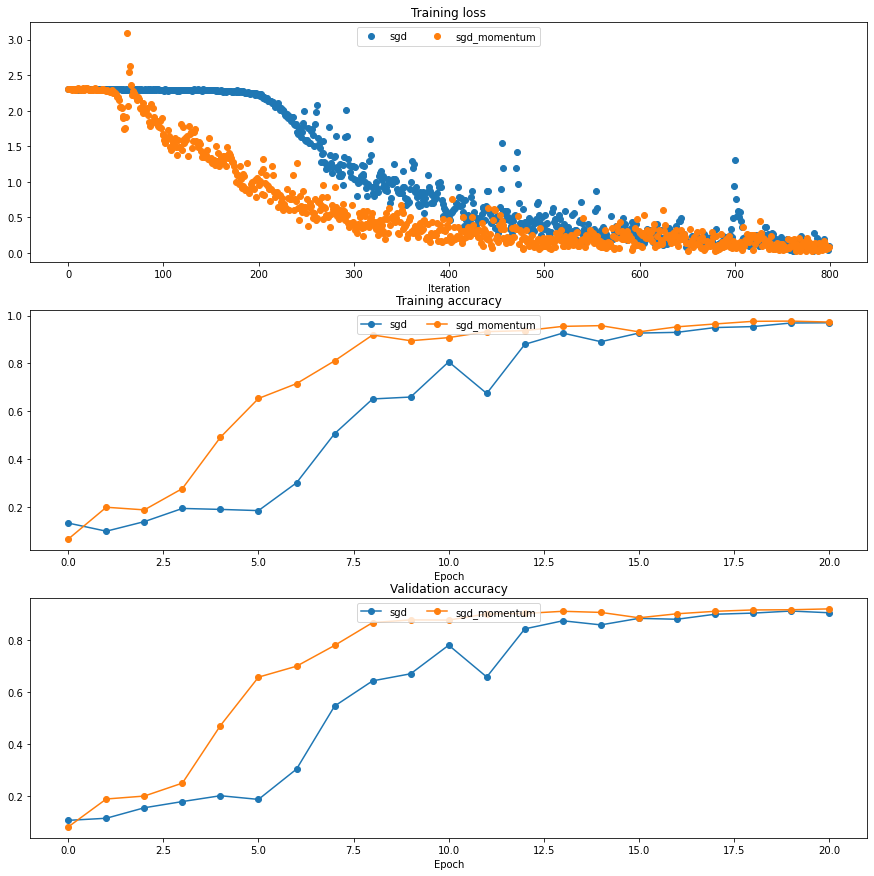

In [33]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('running with {}'.format(update_rule))
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=20, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 0.15,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Convolutional Networks

So far we have worked with deep fully-connected networks, using them to explore different optimization strategies and network architectures. Fully-connected networks are a good testbed for experimentation because they are very computationally efficient, but in practice all state-of-the-art results use convolutional networks instead.

First you will implement several layer types that are used in convolutional networks. You will then use these layers to train a convolutional network on the MNIST dataset.

# Convolution: Naive forward pass
The core of a convolutional network is the convolution operation. In the file `layers.py`, implement the forward pass for the convolution layer in the function `conv_forward_naive`. 

You don't have to worry too much about efficiency at this point; just write the code in whatever way you find most clear.

You can test your implementation by running the following:

In [34]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward_naive(x, w, b, conv_param)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# Compare your output to ours; difference should be around 1e-8
print('Testing conv_forward_naive')
print('difference: {}'.format(rel_error(out, correct_out)))

Testing conv_forward_naive
difference: 2.2121476417505994e-08


# Aside: Image processing via convolutions

As fun way to both check your implementation and gain a better understanding of the type of operation that convolutional layers can perform, we will set up an input containing two images and manually set up filters that perform common image processing operations (grayscale conversion and edge detection). The convolution forward pass will apply these operations to each of the input images. We can then visualize the results as a sanity check.

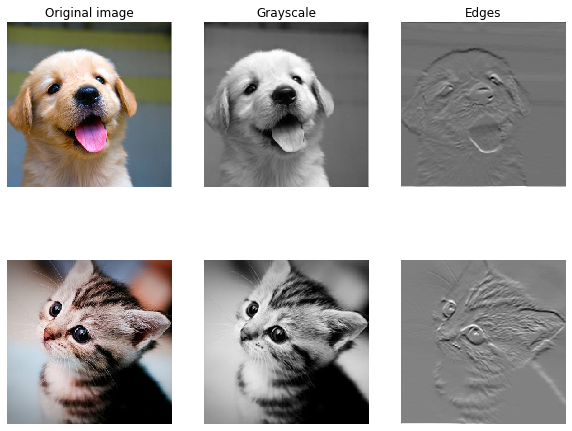

In [35]:
from PIL import Image
from imageio import imread

def imresize(image, size):
    return np.array(Image.fromarray(image).resize(size))

kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :]

img_size = 200   # Make this smaller if it runs too slow
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten_cropped, (img_size, img_size)).transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_noax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_noax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_noax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()

# Convolution: Naive backward pass
Implement the backward pass for the convolution operation in the function `conv_backward_naive` in the file `layers.py`. Again, you don't need to worry too much about computational efficiency.

When you are done, run the following to check your backward pass with a numeric gradient check.

In [36]:
np.random.seed(231)
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_naive(x, w, b, conv_param)[0], b, dout)

out, cache = conv_forward_naive(x, w, b, conv_param)
dx, dw, db = conv_backward_naive(dout, cache)

# Your errors should be around 1e-9'
print('Testing conv_backward_naive function')
print('dx error: {}'.format(rel_error(dx, dx_num)))
print('dw error: {}'.format(rel_error(dw, dw_num)))
print('db error: {}'.format(rel_error(db, db_num)))

Testing conv_backward_naive function
dx error: 1.159803161159293e-08
dw error: 2.247109434939654e-10
db error: 3.37264006649648e-11


# Max pooling: Naive forward
Implement the forward pass for the max-pooling operation in the function `max_pool_forward_naive` in the file `cs231n/layers.py`. Again, don't worry too much about computational efficiency.

Check your implementation by running the following:

In [37]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num=np.prod(x_shape)).reshape(x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = max_pool_forward_naive(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

# Compare your output with ours. Difference should be around 1e-8.
print('Testing max_pool_forward_naive function:')
print('difference: {}'.format(rel_error(out, correct_out)))

Testing max_pool_forward_naive function:
difference: 4.1666665157267834e-08


# Max pooling: Naive backward
Implement the backward pass for the max-pooling operation in the function `max_pool_backward_naive` in the file `cs231n/layers.py`. You don't need to worry about computational efficiency.

Check your implementation with numeric gradient checking by running the following:

In [38]:
np.random.seed(231)
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward_naive(x, pool_param)[0], x, dout)

out, cache = max_pool_forward_naive(x, pool_param)
dx = max_pool_backward_naive(dout, cache)

# Your error should be around 1e-12
print('Testing max_pool_backward_naive function:')
print('dx error: {}'.format(rel_error(dx, dx_num)))

Testing max_pool_backward_naive function:
dx error: 3.27562514223145e-12


# Fast layers
Making convolution and pooling layers fast can be challenging. To spare you the pain, we've provided fast implementations of the forward and backward passes for convolution and pooling layers in the file `fast_layers.py`.

The API for the fast versions of the convolution and pooling layers is exactly the same as the naive versions that you implemented above: the forward pass receives data, weights, and parameters and produces outputs and a cache object; the backward pass recieves upstream derivatives and the cache object and produces gradients with respect to the data and weights.

**NOTE:** The fast implementation for pooling will only perform optimally if the pooling regions are non-overlapping and tile the input. If these conditions are not met then the fast pooling implementation will not be much faster than the naive implementation.

You can compare the performance of the naive and fast versions of these layers by running the following:

In [39]:
from fast_layers import conv_forward_fast, conv_backward_fast
from time import time

np.random.seed(231)
x = np.random.randn(100, 3, 31, 31)
w = np.random.randn(25, 3, 3, 3)
b = np.random.randn(25,)
dout = np.random.randn(100, 25, 16, 16)
conv_param = {'stride': 2, 'pad': 1}

t0 = time()
out_naive, cache_naive = conv_forward_naive(x, w, b, conv_param)
t1 = time()
out_fast, cache_fast = conv_forward_fast(x, w, b, conv_param)
t2 = time()

print('Testing conv_forward_fast:')
print('Naive: {}s'.format(t1 - t0))
print('Fast: {}s'.format(t2 - t1))
print('Speedup: {}x'.format((t1 - t0) / (t2 - t1)))
print('Difference: {}s'.format(rel_error(out_naive, out_fast)))

t0 = time()
dx_naive, dw_naive, db_naive = conv_backward_naive(dout, cache_naive)
t1 = time()
dx_fast, dw_fast, db_fast = conv_backward_fast(dout, cache_fast)
t2 = time()

print('\nTesting conv_backward_fast:')
print('Naive: {}s'.format(t1 - t0))
print('Fast: {}s'.format(t2 - t1))
print('Speedup: {}x'.format((t1 - t0) / (t2 - t1)))
print('dx difference: {}'.format(rel_error(dx_naive, dx_fast)))
print('dw difference: {}'.format(rel_error(dw_naive, dw_fast)))
print('db difference: {}'.format(rel_error(db_naive, db_fast)))

Testing conv_forward_fast:
Naive: 0.20194554328918457s
Fast: 0.007991552352905273s
Speedup: 25.26987678630031x
Difference: 4.926407851494105e-11s

Testing conv_backward_fast:
Naive: 0.7361490726470947s
Fast: 0.06791543960571289s
Speedup: 10.8392005841507x
dx difference: 1.006330206620509e-11
dw difference: 2.347380318016531e-13
db difference: 0.0


In [40]:
from fast_layers import max_pool_forward_fast, max_pool_backward_fast

np.random.seed(231)
x = np.random.randn(100, 3, 32, 32)
dout = np.random.randn(100, 3, 16, 16)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

t0 = time()
out_naive, cache_naive = max_pool_forward_naive(x, pool_param)
t1 = time()
out_fast, cache_fast = max_pool_forward_fast(x, pool_param)
t2 = time()

print('Testing pool_forward_fast:')
print('Naive: {}s'.format(t1 - t0))
print('fast: {}s'.format(t2 - t1))
print('speedup: {}x'.format((t1 - t0) / (t2 - t1)))
print('difference: {}'.format(rel_error(out_naive, out_fast)))

t0 = time()
dx_naive = max_pool_backward_naive(dout, cache_naive)
t1 = time()
dx_fast = max_pool_backward_fast(dout, cache_fast)
t2 = time()

print('\nTesting pool_backward_fast:')
print('Naive: {}s'.format(t1 - t0))
print('fast: {}s'.format(t2 - t1))
print('speedup: {}x'.format((t1 - t0) / (t2 - t1)))
print('dx difference: {}'.format(rel_error(dx_naive, dx_fast)))

Testing pool_forward_fast:
Naive: 0.43361520767211914s
fast: 0.003978729248046875s
speedup: 108.98334132310643x
difference: 0.0

Testing pool_backward_fast:
Naive: 1.0168302059173584s
fast: 0.012043237686157227s
speedup: 84.431631461208x
dx difference: 0.0


# Convolutional "sandwich" layers
Previously we introduced the concept of "sandwich" layers that combine multiple operations into commonly used patterns. In the file `layer_utils.py` you will find sandwich layers that implement a few commonly used patterns for convolutional networks.

In [41]:
from layer_utils import conv_relu_pool_forward, conv_relu_pool_backward

x = np.random.randn(2, 3, 16, 16)
w = np.random.randn(3, 3, 3, 3)
b = np.random.randn(3,)
dout = np.random.randn(2, 3, 8, 8)
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

out, cache = conv_relu_pool_forward(x, w, b, conv_param, pool_param)
dx, dw, db = conv_relu_pool_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], b, dout)

print('Testing conv_relu_pool')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing conv_relu_pool
dx error: 2.155756496532429e-08
dw error: 2.9740648034815726e-10
db error: 1.8913806012984647e-11


# Three-layer ConvNet
Now that you have implemented all the necessary layers, we can put them together into a simple convolutional network.

Open the file `cnn.py` and complete the implementation of the `ThreeLayerConvNet` class. Run the following cells to help you debug:

## Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization this should go up.

In [42]:
from cnn import ThreeLayerConvNet
model = ThreeLayerConvNet()

N = 50
X = np.random.randn(N, 1, 28, 28)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): {}'.format(loss))

model.reg = 0.5
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): {}'.format(loss))

Initial loss (no regularization): 2.3025848388671877
Initial loss (with regularization): 2.4599018663167955


## Gradient check
After the loss looks reasonable, use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer.

In [43]:
num_inputs = 2
input_dim = (3, 16, 16)
reg = 0.0
num_classes = 10
np.random.seed(231)
X = np.random.randn(num_inputs, *input_dim)
y = np.random.randint(num_classes, size=num_inputs)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dim=input_dim, hidden_dim=7,
                          dtype=np.float64)
                          
loss, grads = model.loss(X, y)
for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.053965e-04
W2 max relative error: 1.822723e-02
W3 max relative error: 3.422399e-04
b1 max relative error: 3.397321e-06
b2 max relative error: 2.517459e-03
b3 max relative error: 9.711800e-10


## Overfit small data
A nice trick is to train your model with just a few training samples. You should be able to overfit small datasets, which will result in very high training accuracy and comparatively low validation accuracy.

In [42]:
np.random.seed(231)

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=0.14)

solver = Solver(model, small_data,
                num_epochs=20, batch_size=50,
                update_rule='sgd_momentum',
                optim_config={
                  'learning_rate': 1e-2,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 20) loss: 6.071851
(Epoch 1 / 20) train acc: 0.080000; val_acc: 0.095700
(Iteration 2 / 20) loss: 5.752687
(Epoch 2 / 20) train acc: 0.240000; val_acc: 0.185600
(Iteration 3 / 20) loss: 3.312177
(Epoch 3 / 20) train acc: 0.360000; val_acc: 0.207100
(Iteration 4 / 20) loss: 2.591950
(Epoch 4 / 20) train acc: 0.460000; val_acc: 0.272500
(Iteration 5 / 20) loss: 1.743473
(Epoch 5 / 20) train acc: 0.460000; val_acc: 0.301800
(Iteration 6 / 20) loss: 1.999561
(Epoch 6 / 20) train acc: 0.600000; val_acc: 0.357600
(Iteration 7 / 20) loss: 1.418867
(Epoch 7 / 20) train acc: 0.700000; val_acc: 0.405900
(Iteration 8 / 20) loss: 0.942613
(Epoch 8 / 20) train acc: 0.700000; val_acc: 0.407000
(Iteration 9 / 20) loss: 1.141743
(Epoch 9 / 20) train acc: 0.640000; val_acc: 0.394600
(Iteration 10 / 20) loss: 0.854263
(Epoch 10 / 20) train acc: 0.660000; val_acc: 0.405000
(Iteration 11 / 20) loss: 0.945953
(Epoch 11 / 20) train acc: 0.760000; val_acc: 0.428300
(Iteration 12 / 20) loss: 0.

Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

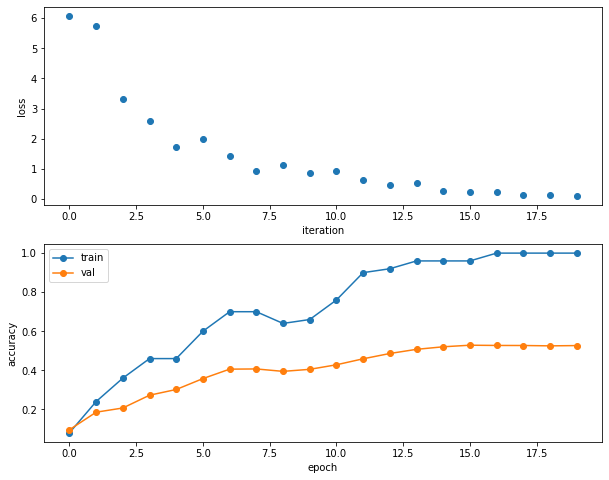

In [43]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Train the net
By training the three-layer convolutional network for one epoch, you should achieve greater than 95% accuracy on the training set:

In [44]:
model = ThreeLayerConvNet(weight_scale=0.05, hidden_dim=200, reg=0.01)

solver = Solver(model, data,
                num_epochs=1, batch_size=100,
                update_rule='sgd_momentum',
                optim_config={
                  'learning_rate': 0.1,
                },
                verbose=True, print_every=20)
solver.train()

(Iteration 1 / 500) loss: 18.017208
(Epoch 0 / 1) train acc: 0.255000; val_acc: 0.207400
(Iteration 21 / 500) loss: 13.194700
(Iteration 41 / 500) loss: 9.064217
(Iteration 61 / 500) loss: 5.901083
(Iteration 81 / 500) loss: 3.939853
(Iteration 101 / 500) loss: 2.673120
(Iteration 121 / 500) loss: 1.776342
(Iteration 141 / 500) loss: 1.265661
(Iteration 161 / 500) loss: 0.961746
(Iteration 181 / 500) loss: 0.732932
(Iteration 201 / 500) loss: 0.706494
(Iteration 221 / 500) loss: 0.525051
(Iteration 241 / 500) loss: 0.464245
(Iteration 261 / 500) loss: 0.347502
(Iteration 281 / 500) loss: 0.367538
(Iteration 301 / 500) loss: 0.413083
(Iteration 321 / 500) loss: 0.375348
(Iteration 341 / 500) loss: 0.376459
(Iteration 361 / 500) loss: 0.388788
(Iteration 381 / 500) loss: 0.377538
(Iteration 401 / 500) loss: 0.375663
(Iteration 421 / 500) loss: 0.415725
(Iteration 441 / 500) loss: 0.348676
(Iteration 461 / 500) loss: 0.450000
(Iteration 481 / 500) loss: 0.358992
(Epoch 1 / 1) train acc: 0

## Visualize Filters
You can visualize the first-layer convolutional filters from the trained network by running the following:

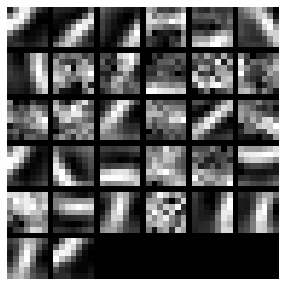

In [159]:
from vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8').reshape((grid.shape[0], grid.shape[1])))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

# Experiment!
Experiment and try to get the best performance that you can on MNIST using a CNN. Here are some ideas to get you started:

### Things you should try:
- Filter size: Above we used 7x7; this makes pretty pictures but smaller filters may be more efficient
- Number of filters: Above we used 32 filters. Do more or fewer do better?
- Network architecture: The network above has two layers of trainable parameters. Can you do better with a deeper network? You can implement alternative architectures in the file `cnn.py`. Some good architectures to try include:
    - [conv-relu-pool]xN - conv - relu - [affine]xM - [softmax or SVM]
    - [conv-relu-pool]XN - [affine]XM - [softmax or SVM]
    - [conv-relu-conv-relu-pool]xN - [affine]xM - [softmax or SVM]

### Tips for training
For each network architecture that you try, you should tune the learning rate and regularization strength. When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations
- Remember the course-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.
- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.

### Going above and beyond
If you are feeling adventurous there are many other features you can implement to try and improve your performance. You are **not required** to implement any of these.

- Alternative update steps: For the assignment we implemented SGD+momentum; you could try alternatives like RMSprop and Adam.
- Alternative activation functions such as leaky ReLU, parametric ReLU, or MaxOut.
- Model ensembles
- Data augmentation


### What we expect
At the very least, you should be able to train a CNN that gets at least 98% accuracy on the validation set. This is just a lower bound - if you are careful it should be possible to get accuracies higher than that! 

Have fun and happy training!

In [ ]:
# begin answer
from cnn import ThreeLayerConvNet
'''
here I create a new net in cnn.py like ThreeConvNet before. 
the Net structure is like this:
[ conv - relu - 2x2 max pool ] x 2 - affine - relu - affine - softmax 
'''
# model = ExpConvNet(weight_scale=0.05, hidden_dim=512, reg=0.01)
model = ThreeLayerConvNet(num_filters=128, filter_size=3, hidden_dim=512, weight_scale=0.01, reg=0.001)
data = get_MNIST_data()
data = {
    'X_train': data['X_train'],  # training data
    'y_train': data['y_train'],  # training labels
    'X_val':  data['X_val'],  # validation data
    'y_val': data['y_val']  # validation labels
}

solver = Solver(model, data,
                num_epochs=20, batch_size=64,
                update_rule='sgd_momentum',
                optim_config={
                  'learning_rate': 0.003   ,
                },
                # lr_decay=0.5,
                verbose=True, print_every=20)
solver.train()
# end answer  

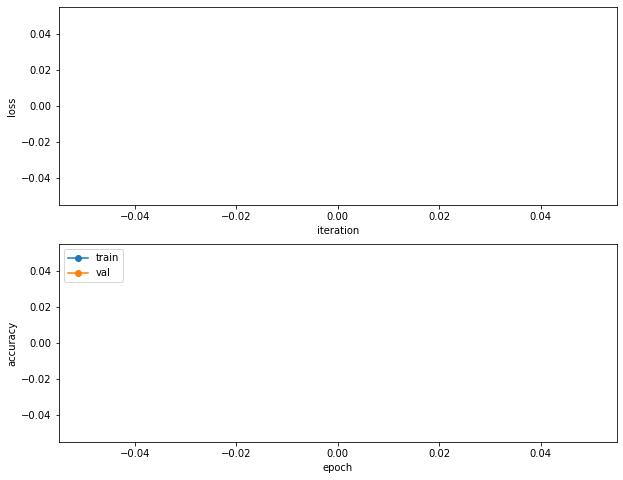

In [20]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()